# FYS - STK Project 2

## Classification with logistic regression

In [1]:
#Importing and showing the data
import pandas as pd
from sklearn.datasets import load_breast_cancer
%matplotlib inline
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


The data set consists of 569 measurements with 30 features, labeled in the last column shown above, as benign or malignant. This data set will be used to train two classification algorithms: Logistic regression with gradient descent and a neural network with stochastic gradient descent. This section develops the logistic regression algorithm. The data set is split into a test and train set using the sklearn method. 

In [2]:
from sklearn.model_selection import train_test_split
features, target = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train.shape, y_train.shape

((426, 30), (426,))

Using just the raw data without any preprocessing:

In [15]:
from LogReg import LogisticRegression
import time
t0 = time.time()
LR_weights = LogisticRegression(X_train, y_train,l_rate = 1e-7,
                     tol=1e-1, max_iter = 1e+7)
t = time.time() - t0

tolerance not reached after 9999999 iterations. Cost gradient norm= 2.085492626922236 


In [16]:
t/60

6.876569080352783

Even with a learning rate of $10^{-7}$, and $10^7$ iterations the cost gradient norm does not converge to a value under the tolerance of 0.1.

The output of the logistic regression is an array of coefficients $\pmb{\beta}$ where 
$$ \pmb{p} = \frac{\exp{\pmb{X \beta}}}{1 + \exp{\pmb{X \beta}}}$$
is the probability of the sample being in the target class. Below, the weights are applied to the test set feature matrix, and compared to the labels.

In [18]:
from LogReg import test_prediction
test_prediction(X_test, y_test, LR_weights)

0.9230769230769231

The classifier predicts over 90 \%  of the test samples correctly. To reduce the amount of data, a PCA is applied to pick out a projection onto orthogonal subspaces where 95\% of the variance is retained in the feature set. The features are also scaled to unit variance and the mean is substracted to hopefully improve the success rate.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_processed = scaler.transform(X_train)
X_test_processed = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca= PCA(n_components=.95)
pca.fit(X_train_processed)
X_train_processed = pca.transform(X_train)
X_test_processed = pca.transform(X_test)
X_train_processed.shape, X_test_processed.shape

((426, 10), (143, 10))

PCA reduces the amount of features from 30 to 10. Applying logistic regression again:

In [20]:
t0 = time.time()
LR_weights_processed = LogisticRegression(X_train_processed, y_train,l_rate = 1e-7,
                     tol=1e-1, max_iter = 1e+7)
t = time.time() - t0

tolerance not reached after 9999999 iterations. Cost gradient norm= 3.3432848291116746 


In [22]:
t/60

6.453380187352498

In [23]:
test_prediction(X_test_processed, y_test, LR_weights_processed)

0.9090909090909091

The predictions are essentially the same after preprocessing, but the algorithm is slighly faster, although not significantly. The algorithm terminates at a higher value for the cost gradient norm, but this is to be expected after PCA. Further reduction of the learning rate does not improve results markedly without allowing an extremely many iterations and a lot of spare time. The higly optimized scikit-learn library provides a fast logistic regression method:

In [30]:
from sklearn.linear_model import LogisticRegression as sklearn_LR
clf = sklearn_LR()
clf.fit(X_train_processed, y_train)
clf.score(X_test_processed, y_test)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9090909090909091

In [37]:
from sklearn.linear_model import LogisticRegression as sklearn_LR
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9230769230769231

This method produces the exact same prediction accuracy as the home made algorithm both with and without preprocessing

## Classification with a neural network

We now attempt the same classification task with a neural network. The network is set up with a stochastic gradient descent solver. The hidden layer activation functions are exponential liear units, while in the last layer softmax is used to produce outputs that can be interpreted as probabilities, i.e. they sum to one. The ELU activations are chosen over the sigmoid after some trial and error, because the networks tens to predict output 0 for all samples, for almost all tests of $\lambda$ and $\eta$ values. The cost function is the log likelihood. This task could in principle be done with one output neuron using cross-entropy cost, but because the softmax log likelihood can also be applied to multiclass classification, it is chosen as the classifiaction method, allowing for a more flexible algorithm. 

The network is initialized with 30 neurons in the input layer, 50 hidden neurons and 2 output neurons, and the binary target vector is one hot-transformed, i.e.
$$ 1 \rightarrow \pmatrix{1\\ 0} \text{  ,  }0 \rightarrow \pmatrix{0\\ 1}. $$
To find the best regualarization parameter and learning rate, a grid search is performed. I have already searched a bit for the best parameters, and the network predicts only zeros for learning rates over $10^{-4}$, so the grid search is performed over a logspace of $\lambda$, but a linear space over over $\eta$. I have also previously narrowed down the choice of viable batch sizes, number of epochs, hidden layer size and ELU parameters. Because the data set is so small, adding more hidden layers do not improve the prediction.

In [119]:
import numpy as np




def grid_search(eta_vals, lmbda_vals):
    train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
    test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
    for i, eta in enumerate(eta_vals):
        for j, lmbd in enumerate(lmbd_vals):
            nn = Network([X_train_processed.shape[1], 20, 2], 
                                activation_function = 'ELU',
                                activation_function_param = 0.6,
                                task = 'classification')

            nn.train(X_train_processed,
                     y_train_onehot,
                     epochs = 50,
                     batch_size = 10,
                     l_rate = eta,
                     lmbd = lmbd)



            train_accuracy[i][j] = nn.accuracy(X_train_processed, y_train)
            test_accuracy[i][j] = nn.accuracy(X_test_processed, y_test)

    import seaborn as sns, matplotlib.pyplot as plt
    sns.set()

    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Training Accuracy")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Test Accuracy")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

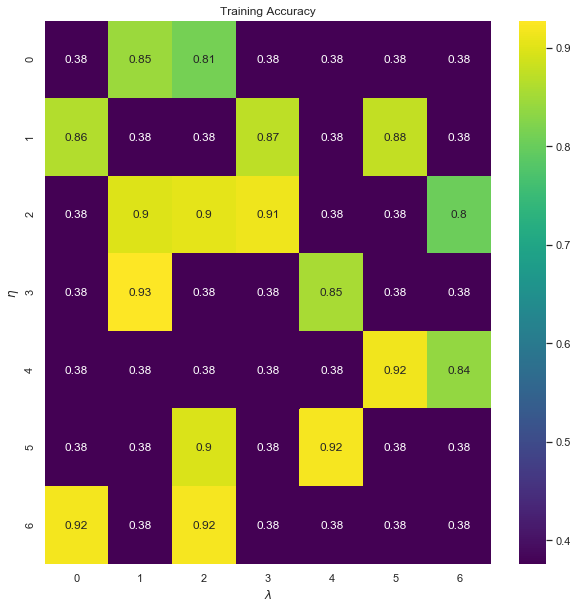

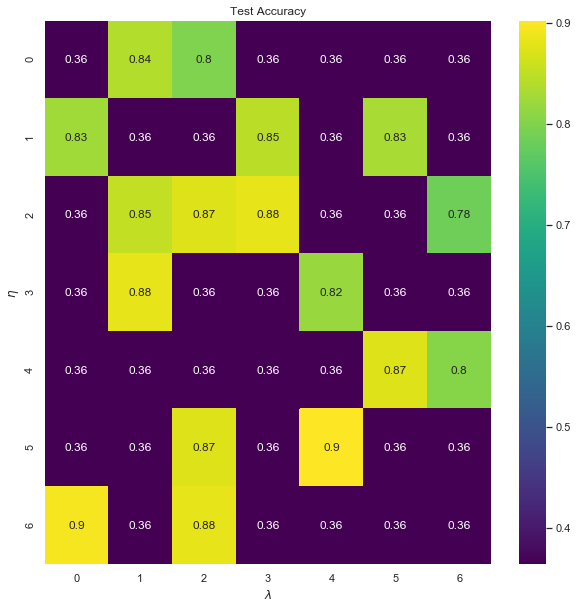

In [120]:
eta_vals = np.linspace(1e-6, 1e-4, 7)
lmbd_vals = np.logspace(-5, 1, 7)
grid_search(eta_vals, lmbd_vals)

In [121]:
eta_vals[4], lmbd_vals[4]

(6.7e-05, 0.1)

We choose the parameters that result in the best prediction on the test set, with $\eta = 6.7\cdot 10^{-5}$ and $\lambda = 0.1$. Ideally, a grid search should be performed over the other parameters as well. Again, Scikit-learn provides a method for classification with a neural net, and the prediction accuracy is about the same overall.  

In [128]:
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier()
MLPclf.fit (X_train, y_train)
MLPclf.score(X_test, y_test)

0.9230769230769231

## Regression with a neural network

Importing the Franke function and generating the regression data set

In [131]:
from Reg_class import DesignMatrix, FrankeFunction, plotter
import numpy as np
n = 50
p = 5
k = 5
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))

x_, y_ = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)

z_ = FrankeFunction(x, y) + noise

x, y, z = x_.reshape(n**2, 1), y_.reshape(n**2, 1), z_.reshape(n**2, 1)
X = DesignMatrix(x, y, p)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, z)

X_reg_train.shape

(1875, 36)

We define a new grid search function for regression, now testing the MSE and R2

In [153]:
from Reg_class import MSE, R2
def grid_search_reg(eta_vals, lmbda_vals):
    train_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
    test_MSE = np.zeros((len(eta_vals), len(lmbd_vals)))
    
    train_R2 = np.zeros((len(eta_vals), len(lmbd_vals)))
    test_R2 = np.zeros((len(eta_vals), len(lmbd_vals)))
    
    for i, eta in enumerate(eta_vals):
        for j, lmbd in enumerate(lmbd_vals):
            nn = Network([X_reg_train.shape[1], 20, 1], 
                                activation_function = 'ELU',
                                activation_function_param = 0.9,
                                task = 'regression')

            nn.train(X_reg_train,
                     y_reg_train,
                     epochs = 200,
                     batch_size = 20,
                     l_rate = eta,
                     lmbd = lmbd)



            train_MSE[i][j] = np.mean((nn.predict(X_reg_train)- y_reg_train)**2)
            test_MSE[i][j] = np.mean((nn.predict(X_reg_test)- y_reg_test)**2)

    import seaborn as sns, matplotlib.pyplot as plt
    sns.set()

    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(train_MSE, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Training MSE")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(test_MSE, annot=True, ax=ax, cmap="viridis")
    ax.set_title("Test MSE")
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\lambda$")
    plt.show()

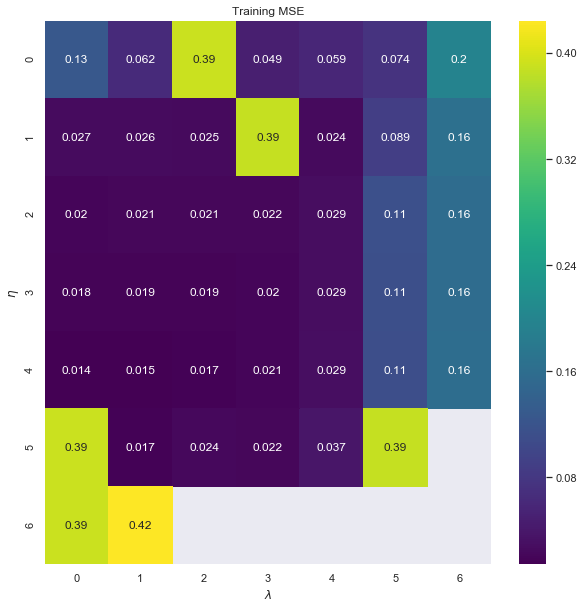

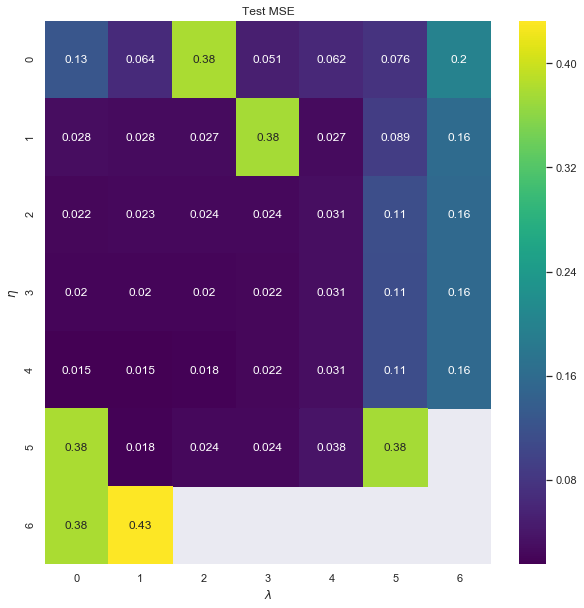

In [154]:
eta_vals = np.logspace(-5, 1, 7)
grid_search_reg(eta_vals, lmbd_vals)

In [155]:
eta_vals[4], lmbd_vals[1]

(0.1, 0.0001)

There are a range of parameter values that give a good fit. 